In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic(u'matplotlib inline')

def showfig(image):
    plt.figure(figsize=(8,8))
    imgplot=plt.imshow(image, "gray")

# Funções de processamento de imagens com OpenCV

Qt de linhas:  370  qt de colunas:  620
Tipo de dado:  uint8
Tamanho da imagem em bytes:  229400


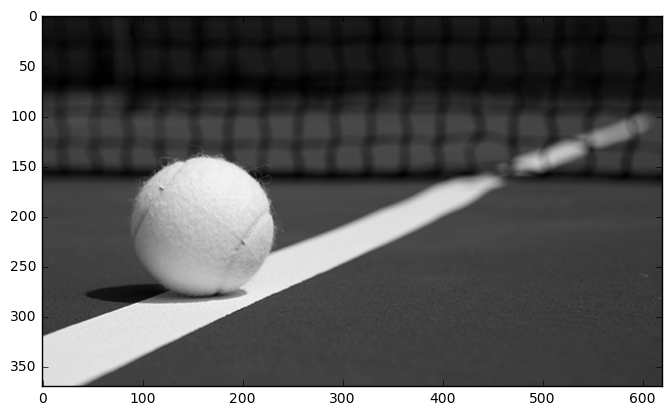

In [3]:
#Leitura e apresentação de uma imagem do disco 
imagem = cv2.imread("tenisball.jpg")
imagem = cv2.cvtColor(imagem.copy(), cv2.COLOR_BGR2GRAY)
cv2.namedWindow("Imagem",0)
#cv2.imshow("Imagem", imagem)
#cv2.waitKey(5000)
#cv2.destroyAllWindows()
showfig(imagem)
#Informações da Imagem
lin, col = imagem.shape
#lin, col, ch= imagem.shape - imagem com cores
print ("Qt de linhas: ",lin, " qt de colunas: ", col)
print ("Tipo de dado: ", imagem.dtype)
print ("Tamanho da imagem em bytes: ", imagem.size)

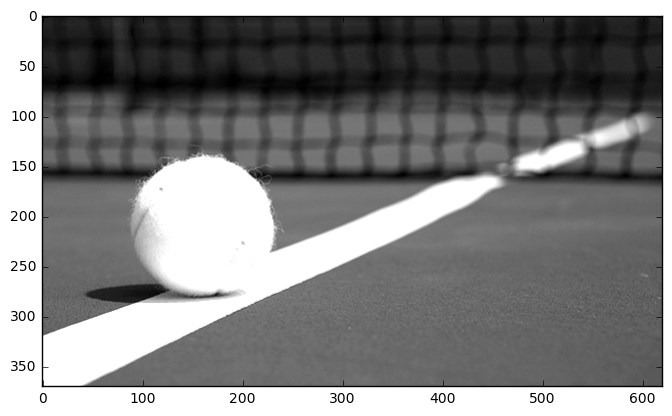

In [4]:
#Processamento pixel a pixel
def brilhoContraste(a,b):
    imagem2 = imagem.copy().astype("float")
    for i in range(0,lin):
        for j in range(0,col):
            if( a*imagem[i][j].astype("float") + b <= 255.0):
                imagem2[i][j] = a*(imagem[i][j].astype("float")) + b
            else:
                imagem2[i][j] = 255.0
    return imagem2
                
#aumentando o brilho
im = brilhoContraste(1.0, 100.0)
showfig(im)


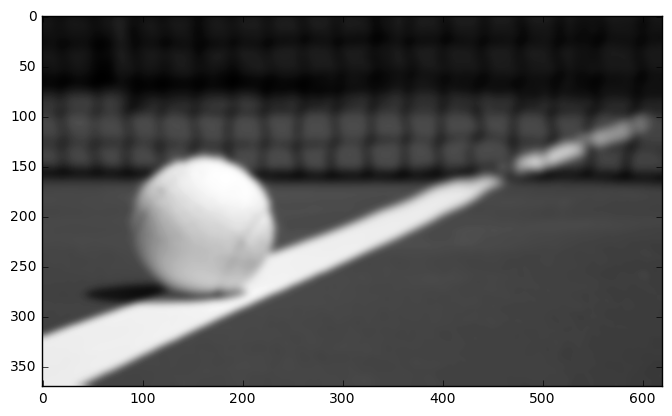

In [15]:
#Exemplo de filtro 
blur = cv2.GaussianBlur(imagem,(21,21),0)
showfig(blur)

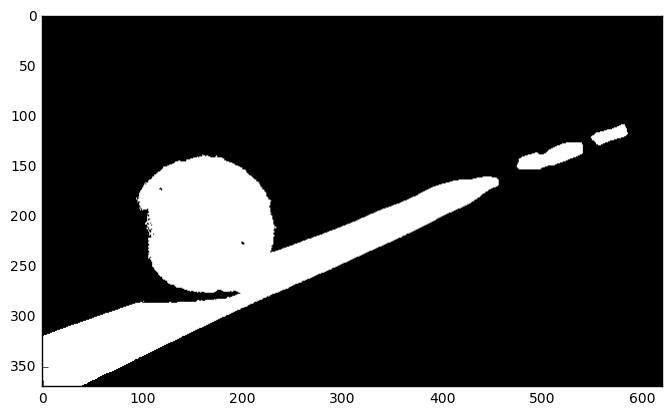

In [17]:
#Limiarização
ret,th = cv2.threshold(imagem,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
showfig(th)

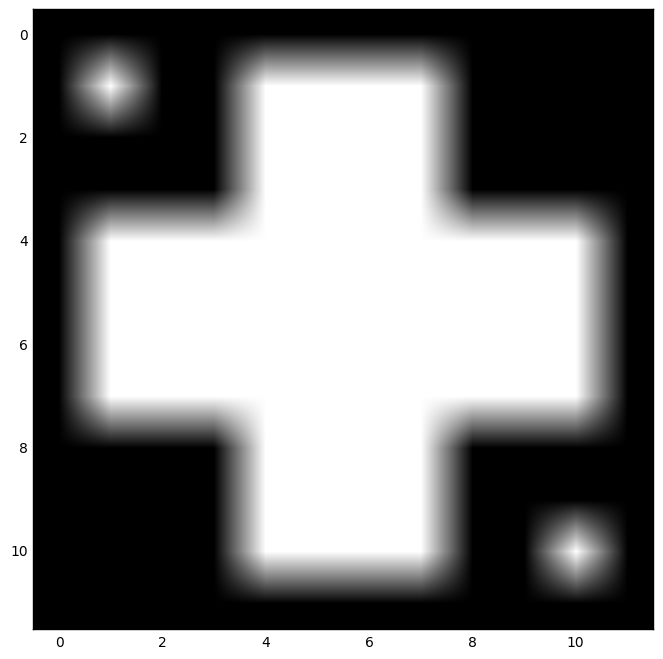

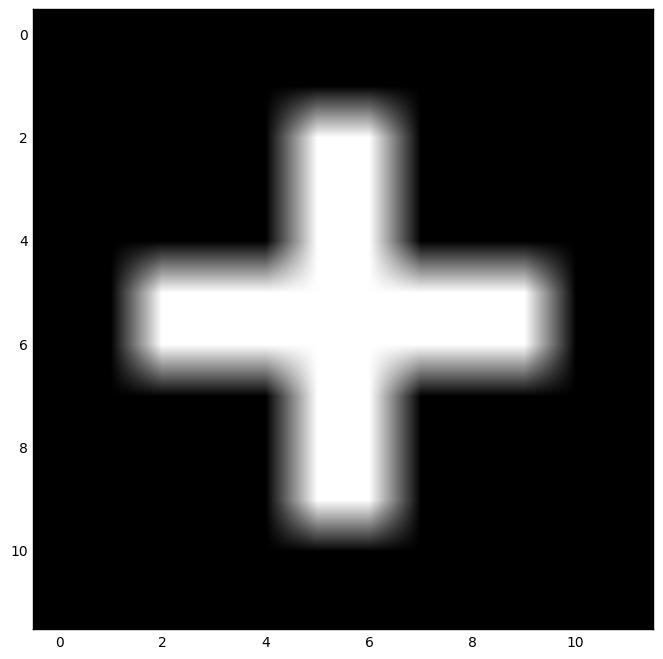

In [9]:
#Morfologia matematica
cruz = np.array([  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 255, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0,],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 255 , 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ], np.uint8)
showfig(cruz)
kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(cruz, kernel)

showfig(img_erosion)


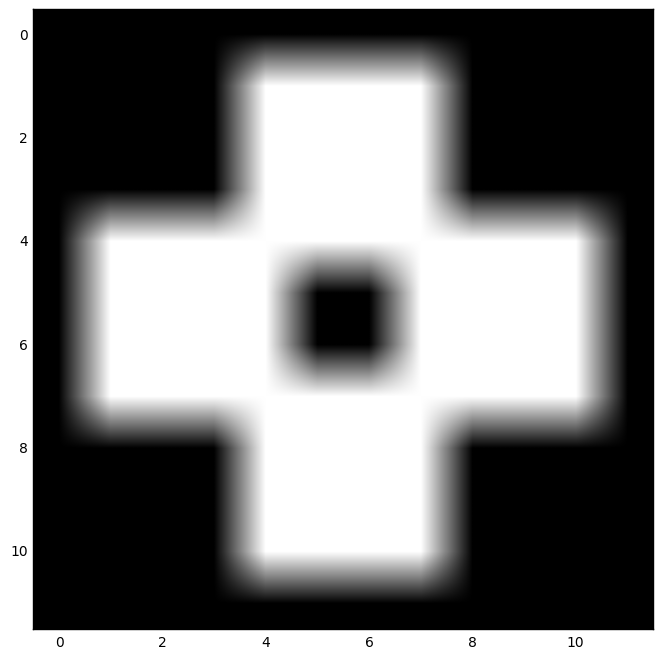

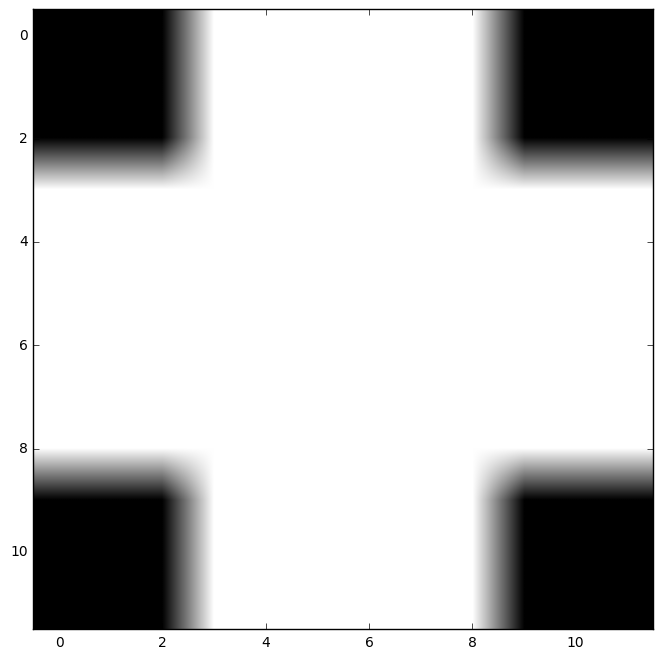

In [8]:
cruz2 = np.array([  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 0, 0, 255, 255, 255, 255, 0],
                   [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0,],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0, 0],
                   [0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 0 , 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ], np.uint8)
img_dilation = cv2.dilate(cruz2, kernel)
showfig(cruz2)
showfig(img_dilation)